<a href="https://colab.research.google.com/github/shrutigosain/2024Fall_projects/blob/main/PR_Final_Project_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# User Attributes

In [ ]:
class User:

    def __init__(self, age: int, height: float, weight: float, calorie_intake: float, gender: str):
        """
        Initializes a User instance with the provided attributes.

        :param age: age of the user in years.
        :param height: height of the user in cm.
        :param weight: initial weight of the user in kg.
        :param calorie_intake: daily caloric intake of the user in kcal.
        :param gender: gender of the user ('male' or 'female').

        Raises:
            ValueError: If the gender is not 'male' or 'female'.

        >>> user = User(30, 180, 75, 2500, 'female')
        >>> user.gender
        'female'
        """

        self.age = age
        self.height = height
        self.weight = weight
        self.calorie_intake = calorie_intake
        self.gender = gender.lower()

# Activity Type and Intensity

In [ ]:
class Activity:

    def __init__(self):
        """
        Initializes an Activity instance.

        :param activities: dictionary to store activity descriptions and details.
        :param total_duration_minutes: tracks total duration of activities in minutes.

        >>> activity_manager = Activity()
        >>> activity_manager.activities
        {}
        >>> activity_manager.total_duration_minutes
        0
        """
        self.activities = {}  # Dictionary to store activities and their durations
        self.total_duration_minutes = 0  # To keep track of the total duration of all activities


    def prompt_duration(self) -> int:
        """
        Prompts the user to input the duration of an activity in hours and minutes.
        Ensures the entered duration is positive and valid.

        :returns: the duration of the activity in minutes.

        >>> activity_manager = Activity()
        >>> activity_manager.prompt_duration()
        Please enter the workout duration in hours and minutes...
        (User provides valid input: 1 hour, 30 minutes)
        90
        """

        while True:
            try:
                # Asking user for input duration
                print(" You will be prompted to enter your workout duration in hours and then minutes..")
                hours = int(input("Enter the duration in hours: "))
                minutes = int(input("Enter the duration in minutes: "))

                if hours < 0 or minutes < 0 or (hours == 0 and minutes == 0):
                    print("Duration must be positive and greater than 0. Please try again.")
                    continue
                duration_minutes = hours * 60 + minutes  # Convert hours to minutes
                return duration_minutes

            except ValueError:
                print("Invalid input. Please enter valid numbers for hours and minutes.")


    def add_activity(self, description: str, met_value: float) -> bool:
        """
        Adds an activity to the list after validating the total duration.

        :param description: description of the activity.
        :param met_value: MET value associated with the activity.

        :returns: true if the activity is successfully added, false otherwise.

        >>> activity_manager = Activity()
        >>> activity_manager.add_activity("Bicycling, stationary, general", 6.8)
        Please enter the workout duration in hours and minutes...
        (User provides valid input: 1 hour, 30 minutes)
        Activity added successfully.
        True
        """

        duration_minutes = self.prompt_duration()
        if self.total_duration_minutes + duration_minutes > 180:

            # Prevents adding activities if total duration exceeds 3 hours
            print(
                "Error: Total duration of activities exceeds 3 hours. Please re-enter the activity and duration."
            )
            return False
        self.total_duration_minutes += duration_minutes

        # Stores activity description and duration in the dictionary
        self.activities[description] = {
            "met_value": met_value,
            "duration_minutes": duration_minutes
        }
        return True


    def select_bicycle(self) -> bool:
        '''
        Allows the user to select and add a bicycling activity.

        Presents a list of predefined bicycling activities with their MET values. The user selects an activity,
        and its details are added to the list of activities after validating the total duration.

        :returns: true if the activity is successfully added, false otherwise.

        '''
        print("Select a Bicycle Activity Description:")

        # Values from reference paper
        activities = {
            1: (6.8, "Bicycling, stationary, general"),
            2: (3.5, "Bicycling, stationary, 25-30 watts, very light to light effort"),
            3: (4.0, "Bicycling, stationary, 50 watts, light effort"),
            4: (5.0, "Bicycling, stationary, 60 watts, light to moderate effort"),
            5: (5.8, "Bicycling, stationary, 70-80 watts"),
            6: (6.0, "Bicycling, stationary, 90-100 watts, moderate to vigorous"),
            7: (6.8, "Bicycling, stationary, 101-125 watts"),
            8: (8.0, "Bicycling, stationary, 126-150 watts"),
            9: (10.3, "Bicycling, stationary, 151-199 watts"),
            10: (10.8, "Bicycling, stationary, 200-229 watts, vigorous"),
            11: (12.5, "Bicycling, stationary, 230-250 watts, very vigorous"),
            12: (13.8, "Bicycling, stationary, 270-305 watts, very vigorous"),
            13: (16.3, "Bicycling, stationary, >325 watts, very vigorous"),
            14: (9.0, "Bicycling, stationary, RPM/Spin bike class"),
            15: (8.8, "Bicycling, interactive virtual cycling, indoor cycle ergometer"),
            16: (8.8, "Bicycling, high intensity interval training"),
        }

        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False


    def select_conditioning_exercise(self) -> bool:
        """
        Allows the user to select and add a conditioning exercise.

        :returns: true if the activity is successfully added, false otherwise.

        """
        print("Select a Conditioning Exercise Description:")

        # Values from reference paper
        activities = {
            1: (7.5, "Calisthenics (e.g., pushups, sit ups, pull-ups, jumping jacks, burpees, battling ropes), vigorous effort"),
            2: (3.8, "Calisthenics (e.g., pushups, sit ups, pull-ups, lunges), moderate effort"),
            3: (2.8, "Calisthenics (e.g., curl ups, abdominal crunches, plank), light effort"),
            4: (3.5, "Calisthenics, light or moderate effort, general (e.g., back exercises), going up & down from floor (Taylor Code 150)"),
            5: (6.0, "Circuit training, body weight exercises"),
            6: (3.5, "Circuit training, light effort"),
            7: (5.0, "Circuit training, moderate effort"),
            8: (7.5, "Circuit training, including kettlebells, some aerobic movement with minimal rest, general, vigorous intensity"),
            9: (5.0, "Elliptical trainer, moderate effort"),
            10: (9.0, "Elliptical trainer, vigorous effort"),
            11: (6.0, "Resistance (weight lifting – free weight, nautilus or universal-type), power lifting or body building, vigorous effort (Taylor Code 210)"),
            12: (5.0, "Resistance (weight) training, squats, deadlift, slow or explosive effort"),
            13: (3.5, "Resistance (weight) training, multiple exercises, 8-15 reps at varied resistance"),
            14: (5.8, "Resistance Training, circuit, reciprocal supersets, peripheral heart action training"),
            15: (3.0, "Body weight resistance exercises (e.g., squat, lunge, push-up, crunch), general"),
            16: (6.5, "Body weight resistance exercises (e.g., squat, lunge, push-up, crunch), high intensity"),
            17: (9.8, "Kettle bell swings"),
            18: (9.0, "Jumping rope, Digi-Jump Machine, 120 jumps/minute"),
            19: (7.3, "Rowing, stationary ergometer, general, vigorous effort"),
            20: (5.0, "Rowing, stationary ergometer, general, <100 watts, moderate effort"),
            21: (7.5, "Rowing, stationary, 100 to 149 watts, vigorous effort"),
            22: (11.0, "Rowing, stationary, 150 to 199 watts, vigorous effort"),
            23: (14.0, "Rowing, stationary, ≥ 200 watts, very vigorous effort"),
            24: (2.3, "Stretching, mild"),
            25: (1.8, "Pilates, traditional, mat"),
            26: (2.8, "Pilates, general"),
            27: (2.3, "Yoga, Hatha"),
            28: (8.0, "Yoga, high intensity"),
            29: (2.3, "Yoga, General"),
            30: (6.5, "Zumba, group class")
        }

        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False


    def select_running(self) -> bool:
        '''
        Allows the user to select and add a running activity.

        Returns:
        bool: True if the activity is successfully added, False otherwise.
        '''

        print("Select a Running Activity Description:")

        # Values from reference paper
        activities = {
            1: (6.0, "Jog/walk combination (jogging component of less than 10 minutes) (Taylor Code 180)"),
            2: (7.5, "Jogging, general, self-selected pace"),
            3: (4.8, "Jogging, in place"),
            4: (3.3, "Jogging 2.6 to 3.7 mph"),
            5: (4.5, "Jogging on a mini-tramp"),
            6: (6.5, "Running, 4 to 4.2 mph (13 min/mile)"),
            7: (7.8, "Running 4.3 to 4.8 mph"),
            8: (8.5, "Running, 5.0 to 5.2 mph (12 min/mile)"),
            9: (9.0, "Running, 5.5 -5.8 mph"),
            10: (9.3, "Running, 6-6.3 mph (10 min/mile)"),
            11: (10.5, "Running, 6.7 mph (9 min/mile)"),
            12: (11.0, "Running, 7 mph (8.5 min/mile)"),
            13: (11.8, "Running, 7.5 mph (8 min/mile)"),
            14: (12.0, "Running, 8 mph (7.5 min/mile)"),
            15: (12.5, "Running, 8.6 mph (7 min/mile)"),
            16: (13.0, "Running, 9 mph (6.5 min/mile)"),
            17: (14.8, "Running, 9.3 to 9.6 mph"),
            18: (14.8, "Running, 10 mph (6 min/mile)"),
            19: (16.8, "Running, 11 mph (5.5 min/mile)"),
            20: (18.5, "Running, 12 mph (5.0 min/mile)"),
            21: (19.8, "Running, 13 mph (4.6 min/mile)"),
            22: (23.0, "Running, 14 mph (4.3 min/mile)")
        }
        for key, value in activities.items():
            print(f"{key}. {value[1]}")
        choice = int(input("Enter the number corresponding to your choice: "))
        if choice in activities:
            return self.add_activity(activities[choice][1], activities[choice][0])
        else:
            print("Invalid choice.")
            return False

    def get_activity_summary(self) -> pd.DataFrame:
        '''
        Returns the activity summary as a pandas DataFrame.

        Returns:
            pd.DataFrame: A DataFrame containing activity details.

            >>> activity_manager = Activity()
            >>> activity_manager.add_activity("Bicycling, stationary, general", 6.8)
            (User provides valid input: 1 hour, 30 minutes)
            >>> summary = activity_manager.get_activity_summary()
            >>> print(summary)
            Activity                              MET Value  Duration (hours)  Duration (minutes)
            0  Bicycling, stationary, general        6.8                1                  30

        '''
        if not self.activities:
            print("No activities added.")
            return None

        # Convert activities to a DataFrame
        data = [
            {
                "Activity": description,
                "MET Value": details["met_value"],
                "Duration (hours)": details["duration_minutes"] // 60,
                "Duration (minutes)": details["duration_minutes"] % 60
            }
            for description, details in self.activities.items()
        ]
        return pd.DataFrame(data)

    def start(self):
        '''
        Starts the activity selection process. Allows the user to add multiple activities, ensuring the total duration does not exceed 3 hours.

            >>> activity_manager = Activity()
            >>> activity_manager.start()
            Select an Activity Type:
            1. Bicycle
            2. Conditioning Exercise
            3. Running
            (User selects activities and durations interactively)
        '''
        print(
            "Please select the type of activities performed and enter the duration."
        )
        print("Note: Overtraining is not healthy. Duration of all activities should be less than 3 hours.")

        # Selection of the main "TYPE OF ACTIVITY"
        while True:
            print("\nSelect an Activity Type:")
            print("1. Bicycle")
            print("2. Conditioning Exercise")
            print("3. Running")
            activity_type = int(input("Enter the number corresponding to your choice: "))

            if activity_type == 1:
                if not self.select_bicycle():
                    continue
            elif activity_type == 2:
                if not self.select_conditioning_exercise():
                    continue
            elif activity_type == 3:
                if not self.select_running():
                    continue
            else:
                print("Invalid activity type.")
                continue

            print("Activity added successfully!")
            print(f"Total duration so far: {self.total_duration_minutes // 60} hours and {self.total_duration_minutes % 60} minutes.")
            more = input("Do you want to add more activities? (Y to continue, N to exit): ").strip().upper()
            if more == 'N':
                break

        print("\n Summary of Activities:")
        activity_summary = self.get_activity_summary()
        if activity_summary is not None:
            print(activity_summary.to_string(index=False))
        print(f"Total duration of all activities: {self.total_duration_minutes // 60} hours and {self.total_duration_minutes % 60} minutes.")

# Calculations

In [ ]:
class Calculations:

    def calculate_calories_burned(user: 'User', activity_manager: 'Activity') -> float:
        '''
        Calculate the total calories burned during all logged activities.

        Args:
            user (User): The user object containing user details like weight.
            activity_manager (Activity): The activity manager object containing logged activities.

        Returns:
            float: Total calories burned from all activities.

            >>> user = User(30, 175, 75, 2000, 'male')
            >>> activity_manager = Activity()
            >>> activity_manager.activities = {
            "Running": {"met_value": 7.5, "duration_minutes": 30},
            "Cycling": {"met_value": 6.8, "duration_minutes": 45}
            }
            >>> calculate_calories_burned(user, activity_manager, 300)
            956.625
        '''

        # Calculate workout calories using MET values, duration (in hours), and user's weight
        workout_calories = sum(
            activity["met_value"] * (activity["duration_minutes"] / 60) * user.weight
            for activity in activity_manager.activities.values()
        )
        return workout_calories


    def calculate_daily_rmr_change(weight: float, user: 'User') -> float:
        '''
        Calculate the Resting Metabolic Rate (RMR) based on the user's weight, height, age, and gender.

        Args:
            user (User): The user object containing details like weight, height, age, and gender.

        Returns:
            float: The calculated RMR in kcal/day.

            >>> user = User(30, 175, 75, 2000, 'male')
            >>> calculate_daily_rmr_change(75, user)
            1684.7750000000003

        Raises:
        ValueError: If the gender is not 'male' or 'female'.

        '''

        if user.gender == "male":
            # RMR formula for males
            rmr = (10 * 0.453592 * weight) + (6.25 * 2.54 * user.height) - (5 * user.age) + 5
        elif user.gender == "female":
            # RMR formula for females
            rmr = (10 * 0.453592 * weight) + (6.25 * 2.54 * user.height) - (5 * user.age) - 161
        else:
            # Error for invalid gender input
            raise ValueError("Invalid gender. Please enter 'male' or 'female'.")
        return rmr




# In an Ideal scenario when all the variables are fixed and a person follows a strict regime for the entire simulation duration:

In [ ]:
def ideal_scenario(user: 'User', activity_manager: 'Activity', additional_calories: float, weeks: int=12) -> list:
    """
    Perform a simulation to predict weight changes over time based on user data and activities.

    :param user: the user object containing user details such as weight, calorie intake, etc.
    :param activity_manager: the activity manager object containing logged activities and their details.
    :param additional_calories: base additional calories burned from non-workout activities.
    :param weeks: number of weeks for the simulation (default is 12 weeks).

    :returns: array of weight changes over the simulation duration.
    """
    # Simulation parameters
    simulation_duration = weeks * 7  # Duration in days for the number of weeks
    initial_weight = user.weight  # User's initial weight
    weight = initial_weight  # Start with the initial weight
    daily_weights = [weight]  # List to track daily weight changes

    # Take user inputs for required parameters
    workout_days = int(input("Enter the number of workout days per week: "))
    additional_calories = int(input("Enter the additional calories burned daily (non-workout activities): "))
    sleep_duration = int(input("Enter your average sleep duration in hours: "))

    sleep_duration_range = np.random.randint((sleep_duration - 2),(sleep_duration + 2))

    additional_calories_range = np.random.randint((additional_calories - 200 ),(additional_calories + 200))

    # Loop through each day of the simulation
    for day in range(simulation_duration):
        is_workout_day = (day % 7) < workout_days  # Check if the day is a workout day
        workout_calories = 0

        if is_workout_day:
            workout_calories = Calculations.calculate_calories_burned(user, activity_manager)

        # Adjust RMR based on sleep duration
        rmr = Calculations.calculate_daily_rmr_change(daily_weights[-1], user)  # Adjust RMR based on current weight
        rmr_updated = calculate_daily_rmr_change_updated(rmr, sleep_duration_range)

        # Calculate total calories burned
        total_calories_burned = rmr_updated + workout_calories + additional_calories_range

        calorie_intake_range = np.random.randint((user.calorie_intake - 500),(user.calorie_intake + 500))

        # Calculate calorie deficit
        calorie_deficit = total_calories_burned - calorie_intake_range

        # Convert calorie deficit to weight change
        weight -= calorie_deficit / 3500  # 1 lb per 3500 calories
        daily_weights.append(weight)

    return daily_weights, simulation_duration


In [ ]:
def visualize_simulation_ideal(weights_over_time: list, simulation_duration: int) -> None:
    """
    Visualizes the results of a weight loss simulation over time.

    :param weights_over_time: a list where each element represents weight at a given day of the simulation.
    :param simulation_duration: total duration of the simulation in days.

    :returns: None
    """

    # Plot the weight trajectory
    plt.figure(figsize=(12, 6))
    plt.plot(range(simulation_duration + 1), weights_over_time, color='blue', label="Weight Trajectory")

    # Add labels and title
    plt.title("Weight Loss Simulation Over Time")
    plt.xlabel("Days")
    plt.ylabel("Weight (lbs)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Hypothesis 1

# Simulation for weight changes by randomizing two variables (number of workout days and additional calories burnt)

In [ ]:
def monte_carlo_simulation_hypothesis_1(user: 'User', activity_manager: 'Activity', additional_calories: float, weeks: int=12, num_simulations: int=1000):

    '''
    Perform a Monte Carlo simulation to predict weight changes over time based on user data and activities.

    :param user: the user object containing user details such as weight, calorie intake, etc.
    :param activity_manager: the activity manager object containing logged activities and their details.
    :param additional_calories: base additional calories burned from non-workout activities.
    :param weeks: number of weeks for the simulation (default is 12 weeks).
    :param num_simulations: number of Monte Carlo iterations to run (default is 1000).

    :returns: a 2D NumPy array where each row represents weight over time for one simulation.
    '''

    weights_over_time = []
    simulation_duration = weeks * 7  # Duration in days for the number of weeks
    initial_weight = user.weight  # User's initial weight

    for iteration in range(num_simulations):  # Looping for each simulation
        weight = initial_weight
        daily_weights = [weight]

        for day in range(simulation_duration):  # Simulating for each day

            # Randomizing workout days per week
            workout_days = np.random.randint(2, 7)  # Assuming between 2 and 7 workout days per week
            additional_calories = np.random.randint(200, 700)  # Randomizing additional calories burnt
            is_workout_day = random.random() < (workout_days / 7)  # Probability of working out today

            # Calculating daily workout calories burnt
            workout_calories = 0
            if is_workout_day:
                workout_calories = Calculations.calculate_calories_burned(user, activity_manager)

            rmr = Calculations.calculate_daily_rmr_change(daily_weights[day], user)  # Adjusting RMR based on current weight

            total_calories_burned = rmr + workout_calories + additional_calories

            calorie_deficit = total_calories_burned - user.calorie_intake

            # Converting calorie deficit to weight change
            weight -= calorie_deficit / 3500  # 1 lb per 3500 calories
            daily_weights.append(weight)

        weights_over_time.append(daily_weights)

    # Converting to Numpy Array
    weights_over_time = np.array(weights_over_time)
    return weights_over_time, simulation_duration


# Hypothesis 2

# Simulation to introduce further variability by randomizing four variables (calorie intake, sleep duration, workout days, and additional calories burned).
    

In [ ]:
##Updating the RMR calculation based on Sleep Duartion (Randomly chosen between 3 and 10)
def calculate_daily_rmr_change_updated(base_rmr: float, sleep_duration: int) -> float:
    """
    Calculate the adjusted RMR based on sleep duration.
    :param base_rmr: Base Resting Metabolic Rate (RMR)
    :param sleep_duration: Optional parameter, if None a random value between 3-10 is assigned.
    :return: Adjusted RMR

    >>> calculate_daily_rmr_change_updated(2000, 8)
    2000.0
    >>> calculate_daily_rmr_change_updated(2000, 6)
    1800.0
    >>> calculate_daily_rmr_change_updated(2000, None)  # Random sleep duration (doctest: +SKIP)
    (RMR value adjusted based on a random sleep duration between 3 and 10 hours)

    """
    if sleep_duration >= 8:
        adjusted_rmr = base_rmr  # No reduction if the duration is greater than 8 hours
    else:
        reduction_factor = 0.05 * (8 - sleep_duration)  # 5% reduction per hour below 8
        adjusted_rmr = base_rmr * (1 - reduction_factor)

    return adjusted_rmr

In [ ]:
def monte_carlo_simulation_hypothesis_2(user: 'User', activity_manager: 'Activity', additional_calories: float, weeks: int=12, num_simulations: int=1000):

    """
    Perform a Monte Carlo simulation to predict weight changes over time based on user data and activities.

    :param user: the user object containing user details such as weight, calorie intake, etc.
    :param activity_manager: the activity manager object containing logged activities and their details.
    :param additional_calories: base additional calories burned from non-workout activities.
    :param weeks: number of weeks for the simulation (default is 12 weeks).
    :param num_simulations: number of Monte Carlo iterations to run (default is 1000).

    :returns: a 2D NumPy array where each row represents weight over time for one simulation.
    """

    weights_over_time = []
    simulation_duration = weeks * 7  # Duration in days for the number of weeks
    initial_weight = user.weight  # User's initial weight

    for iteration in range(num_simulations):  # Looping for each simulation
        weight = initial_weight
        daily_weights = [weight]

        for day in range(simulation_duration):  # Simulating for each day

            # Randomizing workout days per week
            workout_days = np.random.randint(2, 7)  # Assuming between 2 and 7 workout days per week
            additional_calories = np.random.randint(200, 700)  # Randomizing additional calories burnt
            is_workout_day = random.random() < (workout_days / 7)  # Probability of working out today

            # Calculating daily workout calories burnt
            workout_calories = 0
            if is_workout_day:
                workout_calories = Calculations.calculate_calories_burned(user, activity_manager)

            sleep_duration = np.random.randint(3, 10)

            rmr = Calculations.calculate_daily_rmr_change(daily_weights[day], user)  # Adjusting RMR based on current weight
            rmr_updated = calculate_daily_rmr_change_updated(rmr, sleep_duration)

            total_calories_burned = rmr_updated + workout_calories + additional_calories

            calorie_intake_range = np.random.randint((user.calorie_intake - user.calorie_intake/2),(user.calorie_intake + user.calorie_intake/2))
            calorie_deficit = total_calories_burned - calorie_intake_range

            # Converting calorie deficit to weight change
            weight -= calorie_deficit / 3500  # 1 lb per 3500 calories
            daily_weights.append(weight)

        weights_over_time.append(daily_weights)

    # Converting to Numpy Array
    weights_over_time = np.array(weights_over_time)
    return weights_over_time, simulation_duration


# Visualizations for Hypothesis 1 and Hypothesis 2

In [ ]:
def visualize_simulation(weights_over_time: np.ndarray, simulation_duration: int, num_simulations: int) -> None:
    """
    Visualizes the results of the Monte Carlo weight loss simulation.

    :param weights_over_time: a 2D array where each row represents weight trajectory for one simulation.
    :param simulation_duration: total duration of the simulation in days.
    :param num_simulations: number of Monte Carlo iterations.

    :returns: None
    """
    plt.figure(figsize=(12, 6))
    for i in range(num_simulations):
        plt.plot(range(simulation_duration + 1), weights_over_time[i], alpha=0.05, color='blue')

    # plot the mean trajectory
    mean_weights = weights_over_time.mean(axis=0)
    plt.plot(range(simulation_duration + 1), mean_weights, color='black', linewidth=2, label='Mean Weight')

    plt.title("Monte Carlo Simulation of Weight Loss Over 12 Weeks")
    plt.xlabel("Days")
    plt.ylabel("Weight (lbs)")
    plt.grid(True)

    plt.legend()
    plt.show()



# Varying the weights to check the predicted weight loss for 3 individulas with same user inputs but varying weights by 40

In [ ]:
def monte_carlo_simulation_hypothesis_3(user, activity_manager, additional_calories, weeks=12, num_simulations=1000, weight_offsets=[0, 40, -40]):
    '''
    Perform Monte Carlo simulation for three weight scenarios: initial weight, +40 lbs, and -40 lbs.

    Args:
        user (User): The user object containing user details such as weight, calorie intake, etc.
        activity_manager (Activity): The activity manager object containing logged activities and their details.
        additional_calories (float): Base additional calories burned from non-workout activities.
        weeks (int): Number of weeks for the simulation (default is 12 weeks).
        num_simulations (int): Number of Monte Carlo iterations to run (default is 1000).
        weight_offsets (list): List of weight offsets to simulate (default is [0, +40, -40]).

    Returns:
        dict: A dictionary containing weights over time for each weight scenario.
    '''

    results = {}  # To store results for each weight offset

    for offset in weight_offsets:
        initial_weight = user.weight + offset
        weights_over_time = []
        simulation_duration = weeks * 7  # Duration in days

        for iteration in range(num_simulations):
            weight = initial_weight
            daily_weights = [weight]

            for day in range(simulation_duration):
                # Randomizing workout days per week
                workout_days = np.random.randint(2, 7)
                additional_calories = np.random.randint(200, 700)
                is_workout_day = random.random() < (workout_days / 7)

                # Calculating daily workout calories burned
                workout_calories = 0
                if is_workout_day:
                    workout_calories = Calculations.calculate_calories_burned(user, activity_manager)

                sleep_duration = np.random.randint(3, 10)

                # Adjusting RMR based on current weight
                rmr = Calculations.calculate_daily_rmr_change(daily_weights[day], user)
                rmr_updated = calculate_daily_rmr_change_updated(rmr, sleep_duration)

                total_calories_burned = rmr_updated + workout_calories + additional_calories

                calorie_intake_range = np.random.randint(
                    (user.calorie_intake - user.calorie_intake / 2),
                    (user.calorie_intake + user.calorie_intake / 2)
                )
                calorie_deficit = total_calories_burned - calorie_intake_range

                # Converting calorie deficit to weight change
                weight -= calorie_deficit / 3500
                daily_weights.append(weight)

            weights_over_time.append(daily_weights)

        # Store results for the current offset
        results[offset] = np.array(weights_over_time)

    return results, simulation_duration



In [ ]:
def visualize_simulation_by_weight_3(results, simulation_duration, num_simulations):
    '''
    Visualizes the results of Monte Carlo weight loss simulation for multiple weight scenarios.

    Args:
        results (dict): A dictionary where keys are weight offsets and values are 2D arrays of weight trajectories.
        simulation_duration (int): Total duration of the simulation in days.
        num_simulations (int): Number of Monte Carlo iterations.

    Returns:
        None
    '''

    plt.figure(figsize=(12, 6))

    # Define colors for each weight scenario
    colors = {
        0: 'blue',       # Initial weight
        40: 'green',     # +40 lbs
        -40: 'red'       # -40 lbs
    }

    for weight_offset, weights_over_time in results.items():
        for i in range(num_simulations):
            plt.plot(range(simulation_duration + 1), weights_over_time[i], alpha=0.05, color=colors[weight_offset])

        # Add a label for the first line of each weight offset
        plt.plot([], [], color=colors[weight_offset], label=f"Initial Weight Offset: {weight_offset} lbs")

        mean_weights = weights_over_time.mean(axis=0)
        plt.plot(range(simulation_duration + 1), mean_weights, color="black", linewidth=1,
                 label=f"Mean Weight Offset: {weight_offset} lbs")

    # Add title, labels, legend, and grid
    plt.title("Monte Carlo Simulation of Weight Loss for Different Weight Scenarios")
    plt.xlabel("Days")
    plt.ylabel("Weight (lbs)")

    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Show the plot
    plt.show()


In [ ]:
def visualize_simulation_by_weight_separate(results, simulation_duration, num_simulations):
    '''
    Visualizes the results of Monte Carlo weight loss simulation for multiple weight scenarios.

    Args:
        results (dict): A dictionary where keys are weight offsets and values are 2D arrays of weight trajectories.
        simulation_duration (int): Total duration of the simulation in days.
        num_simulations (int): Number of Monte Carlo iterations.

    Returns:
        None
    '''

    for weight_offset, weights_over_time in results.items():
        plt.figure(figsize=(12, 6))
        for i in range(num_simulations):
            plt.plot(range(simulation_duration + 1), weights_over_time[i], alpha=0.05, color='blue')

        mean_weights = weights_over_time.mean(axis=0)
        plt.plot(range(simulation_duration + 1), mean_weights, color="black", linewidth=1,
                 label=f"Mean Weight Offset: {weight_offset} lbs")

        plt.title(f"Monte Carlo Simulation of Weight Loss (Initial Weight Offset: {weight_offset} lbs)")
        plt.xlabel("Days")
        plt.ylabel("Weight (lbs)")
        plt.grid(True)
        plt.show()


# Main Function




------------------------------------------------------------------------------------------------------------------------------------------------------
Please eneter your personal details so that an appropite weight loss prediction can be visualised
Enter your age (years): 26
Enter your height (inches): 77
Enter your weight (lbs): 180
Enter your daily calorie intake: 3000
Enter your gender (male/female): male

------------------------------------------------------------------------------------------------------------------------------------------------------
Please select the workout catagory, workout type and it's duration in hours and minutes which you performned so that an appropite weight loss prediction can be visualised
Please select the type of activities performed and enter the duration.
Note: Overtraining is not healthy. Duration of all activities should be less than 3 hours.

Select an Activity Type:
1. Bicycle
2. Conditioning Exercise
3. Running
Enter the number correspondin

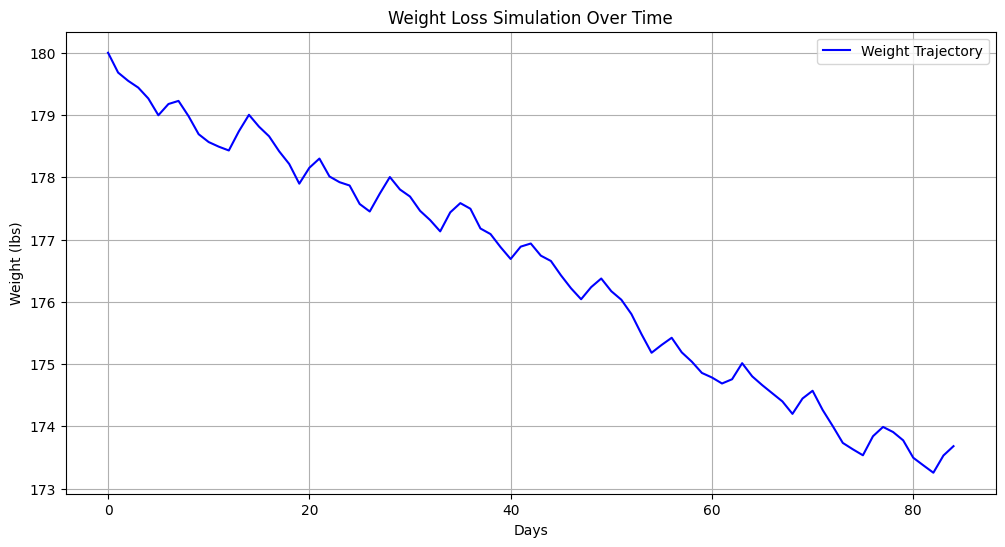


------------------------------------------------------------------------------------------------------------------------------------------------------
Scenario 2: Randomizing Two Variables
This scenario simulates weight changes by randomizing two variables (number of workout days and additional calories burnt).
------------------------------------------------------------------------------------------------------------------------------------------------------



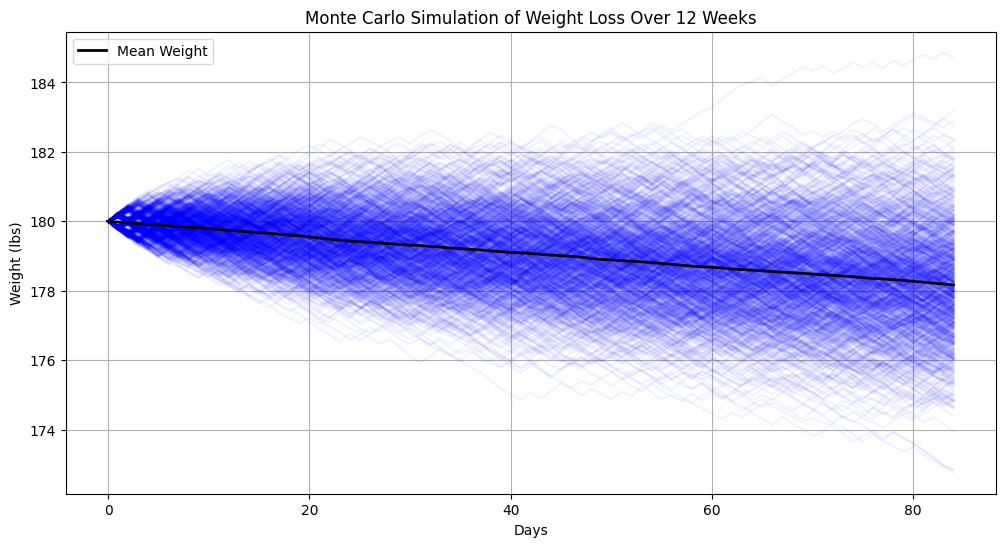


------------------------------------------------------------------------------------------------------------------------------------------------------
Scenario 3: Randomizing Four Variables
This scenario introduces further variability by randomizing four variables (calorie intake, sleep duration, workout days, and additional calories burnt).
------------------------------------------------------------------------------------------------------------------------------------------------------



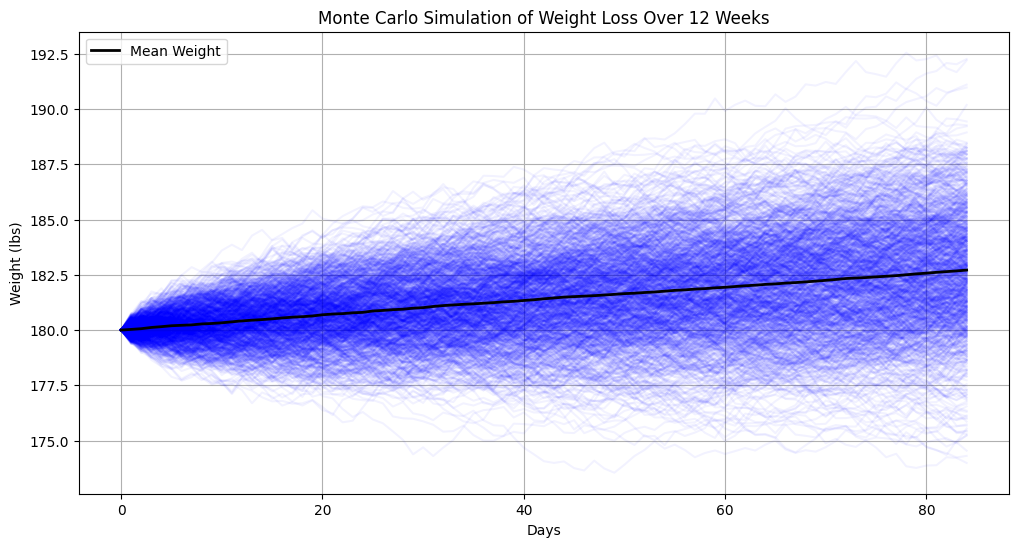


------------------------------------------------------------------------------------------------------------------------------------------------------
Scenario 4: Weight offset and randomizing Four Variables 
This scenario evaluates the weight loss in 3 individuals of with similar age, height, gender, calorie intake, Sleep Duration, Workout Activity, Workour Activity Duration, Additional Calories by doing a weight offset between 3 individuals by 40 and randomizing four variables (calorie intake, sleep duration, workout days, and additional calories burnt).
------------------------------------------------------------------------------------------------------------------------------------------------------



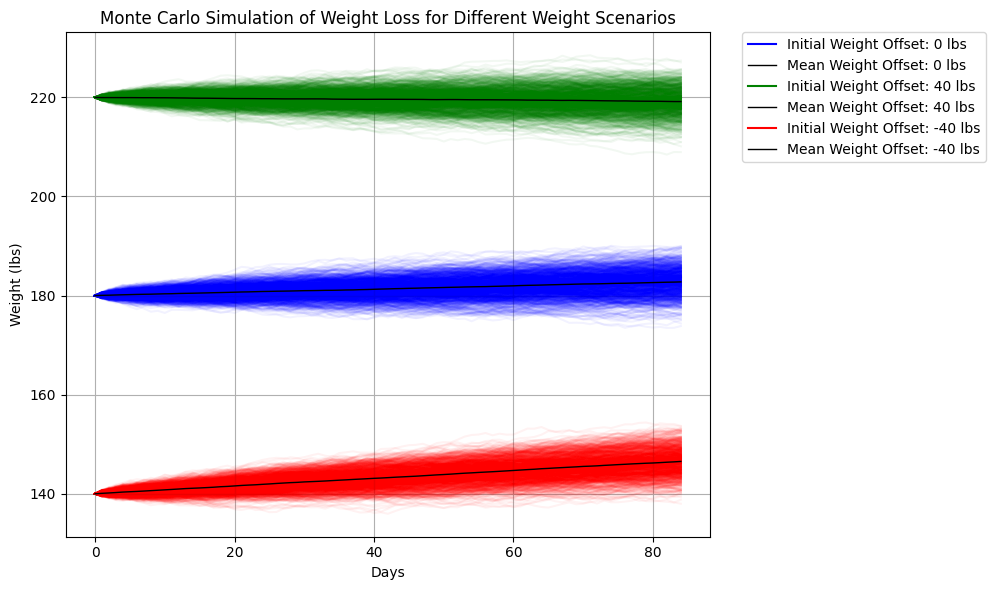

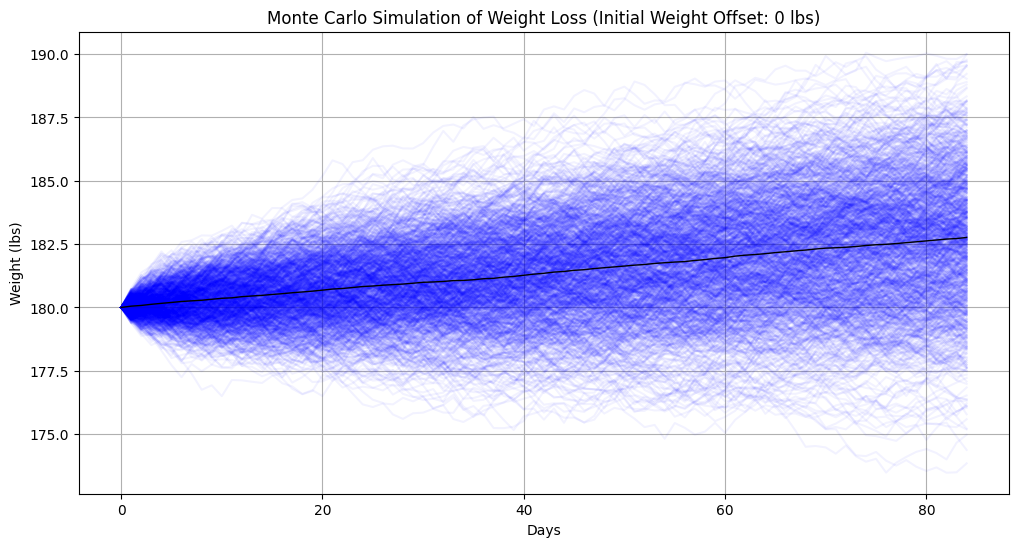

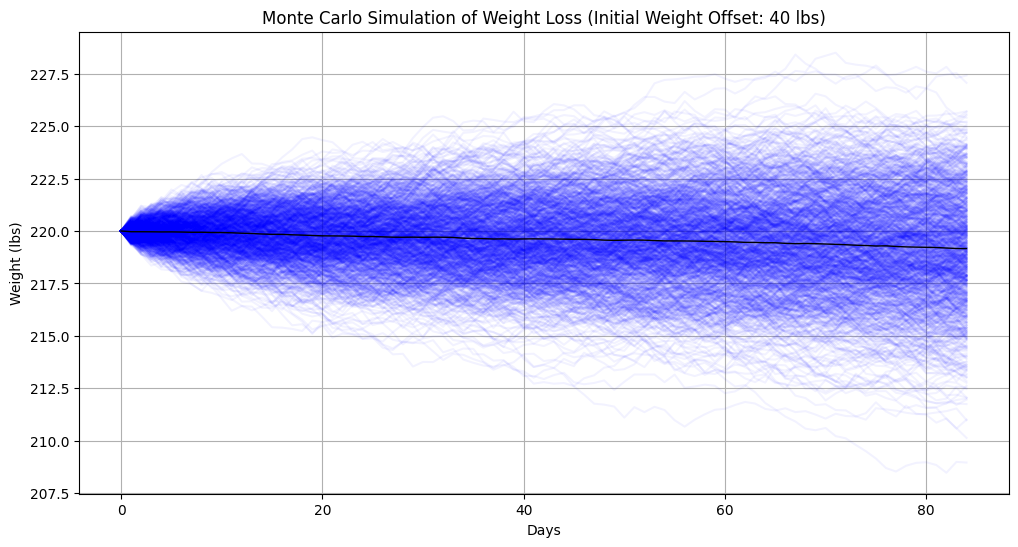

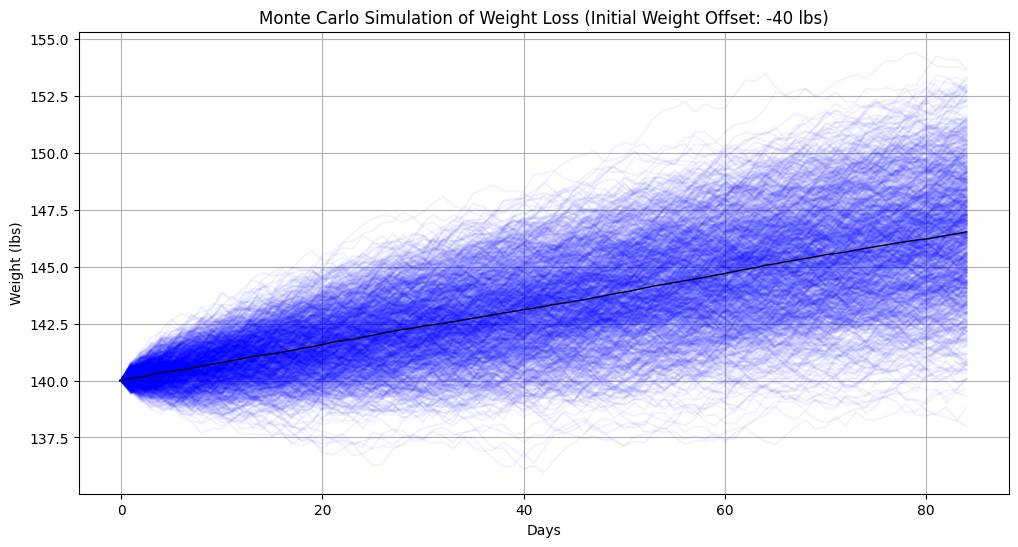

In [ ]:
def main():

    # User inputs

    print("\n" + "-" * 150)
    print("Please eneter your personal details so that an appropite weight loss prediction can be visualised")


    age = int(input("Enter your age (years): "))
    height = int(input("Enter your height (inches): "))
    weight = int(input("Enter your weight (lbs): "))
    calorie_intake = int(input("Enter your daily calorie intake: "))
    gender = input("Enter your gender (male/female): ").strip().lower()

    user_df = pd.DataFrame({
    "Age (years)": [age],
    "Height (inch)": [height],
    "Weight (lbs)": [weight],
    "Calorie Intake": [calorie_intake],
    "Gender": [gender]})

    print("\n" + "-" * 150)
    print("Please select the workout catagory, workout type and it's duration in hours and minutes which you performned so that an appropite weight loss prediction can be visualised")
    user = User(age, height, weight, calorie_intake, gender)
    activity_manager = Activity()
    activity_manager.start()

    print("\nUser Details:")
    print(user_df)

    print("\n" + "-" * 150)
    print("Scenario 1: Ideal Case (No Randomization)")
    print("This scenario calculates weight changes under ideal conditions without randomizing any variables.")
    print("-" * 150 + "\n")

    weights_over_time_ideal, simulation_duration_ideal = ideal_scenario(user, activity_manager, additional_calories=0, weeks=12)
    visualize_simulation_ideal(weights_over_time_ideal, simulation_duration_ideal)

    print("\n" + "-" * 150)
    print("Scenario 2: Randomizing Two Variables")
    print("This scenario simulates weight changes by randomizing two variables (number of workout days and additional calories burnt).")
    print("-" * 150 + "\n")

    weights_over_time, simulation_duration = monte_carlo_simulation_hypothesis_1(user, activity_manager, additional_calories=0, weeks=12, num_simulations=1000)
    visualize_simulation(weights_over_time, simulation_duration, num_simulations=1000)

    print("\n" + "-" * 150)
    print("Scenario 3: Randomizing Four Variables")
    print("This scenario introduces further variability by randomizing four variables (calorie intake, sleep duration, workout days, and additional calories burnt).")
    print("-" * 150 + "\n")

    weights_over_time_new, simulation_duration_new = monte_carlo_simulation_hypothesis_2(user, activity_manager, additional_calories=0, weeks=12, num_simulations=1000)
    visualize_simulation(weights_over_time_new, simulation_duration_new, num_simulations=1000)

    print("\n" + "-" * 150)
    print("Scenario 4: Weight offset and randomizing Four Variables ")
    print("This scenario evaluates the weight loss in 3 individuals of with similar age, height, gender, calorie intake, Sleep Duration, Workout Activity, Workour Activity Duration, Additional Calories by doing a weight offset between 3 individuals by 40 and randomizing four variables (calorie intake, sleep duration, workout days, and additional calories burnt).")
    print("-" * 150 + "\n")

    results, simulation_duration = monte_carlo_simulation_hypothesis_3(user,activity_manager, additional_calories = 500,weeks=12,num_simulations=1000,weight_offsets=[0, 40, -40])
    visualize_simulation_by_weight_3(results, simulation_duration, num_simulations=1000)
    visualize_simulation_by_weight_separate(results, simulation_duration, num_simulations=1000)

if __name__ == "__main__":
    main()

# Conclusion

The simulation confirms that predicted weight loss over a fixed duration increases with the number of workout days and higher daily activity levels. This is evident because both parameters directly influence the total calories burned, leading to larger caloric deficits.

The incorporation of MET values for activities and randomized daily activity levels captures the dynamic relationship between workout intensity, frequency, and weight loss.

The Monte Carlo simulation highlights that weight loss is linear.

The hypothesis is partially validated:
Predicted weight loss indeed increases with more workout days and higher daily activity levels.
Higher initial weight leads to greater variability in predicted weight loss due to the scaling effects of RMR and activity-related calorie expenditure.
The code effectively captures these dynamics by incorporating individualized inputs (e.g., weight, RMR) and stochastic elements (e.g., randomized workout days and activity levels).


While the simulation provides valuable insights, real-world weight loss outcomes depend on additional physiological and behavioral factors not accounted for in the model. The variability observed in simulations underscores the importance of personalization in weight loss strategies.